<div class="alert alert-info">
    For your comments and questions.
    
- EndDate needs to be predicted. Since it is Date or No. I have created a TARGET column - "ContractCancelled". The value of this column is '0' for NO, '1' if there is a date.
- I also calculated 'Days' between the EndDate and the BeginDate.
- Test with All features. Then improve the results if target threshold of >0.9 is not reached.
- All Classification Models to be used.
- Metrics - AUC-ROC, Accuracy. I have also checked F1 score. Printed graphs for AUC-ROC and Confusion Matrix.
</div>


#  1.  PROJECT DESCRIPTION

The telecom operator Interconnect would like to be able to forecast their churn of clients. If it's discovered that a user is planning to leave, they will be offered promotional codes and special plan options. Interconnect's marketing team has collected some of their clientele's personal data, including information about their plans and contracts.

##  Interconnect's services

Interconnect mainly provides two types of services:

1. Landline communication. The telephone can be connected to several lines simultaneously.
2. Internet. The network can be set up via a telephone line (DSL, *digital subscriber line*) or through a fiber optic cable.

Some other services the company provides include:

- Internet security: antivirus software (*DeviceProtection*) and a malicious website blocker (*OnlineSecurity*)
- A dedicated technical support line (*TechSupport*)
- Cloud file storage and data backup (*OnlineBackup*)
- TV streaming (*StreamingTV*) and a movie directory (*StreamingMovies*)

The clients can choose either a monthly payment or sign a 1- or 2-year contract. They can use various payment methods and receive an electronic invoice after a transaction.

##  Data Description

The data consists of files obtained from different sources:

- `contract.csv` — contract information
- `personal.csv` — the client's personal data
- `internet.csv` — information about Internet services
- `phone.csv` — information about telephone services

In each file, the column `customerID` contains a unique code assigned to each client.

The contract information is valid as of February 1, 2020.

Target feature: the `'EndDate'` column equals `'No'`.

Primary metric: AUC-ROC.

Additional metric: Accuracy.

### Assessment criteria:

- AUC-ROC < 0.75 — 0 SP
- 0.75 ≤ AUC-ROC < 0.81 — 4 SP
- 0.81 ≤ AUC-ROC < 0.85 — 4.5 SP
- 0.85 ≤ AUC-ROC < 0.87 — 5 SP
- 0.87 ≤ AUC-ROC < 0.88 — 5.5 SP
- AUC-ROC ≥ 0.88 — 6 SP

#  2.  PROJECT PLAN

##  REQUIREMENTS REVIEW (02/18/21, 2 hours)
- REVIEW THE PROJECT REQUIREMENTS and BONUS PROJECT REQUIREMENTS
- IDENTIFY THE MODEL TYPE REQUIRED (CLASSIFICATION OR REGRESSION)
  - LABELED DATA WITH BOTH FEATURES AND LABEL AVAILABLE
  - CLASSIFICATION MODEL FOR SUPERVISED LEARNING
- MAKE A NOTE OF THE METRICS REQUIRED

##  DATA PREPARATION  (02/19/21, 10 hours)
- DOWNLOAD THE DATA FILES
- SETUP IMPORT LIBRARIES
- IMPORT DATA 
- DATA PREPROCESSING
  - CHECK DATA FOR DUPLICATES, MISSING VALUES
  - COMBINE THE DATA TABLES
  - CHANGE DATA TYPES and DATA in the COLUMNS 
  - IDENTIFY NaN values after COMBINING TABLES
  - IDENTIFY ACTION on NaN VALUES

##  DATA ANALYSIS  (02/20/21, 10 hours)
- EXPLORATORY DATA ANALYSIS
- STATISTICAL DATA ANALYSIS

##  MODEL EVALUATION (02/21/21 - 02/23/21, 15 hours)
- FEATURE ENGINEERING
  - EVALUATE AND IDENTIFY THE FEATURES NEEDED 
  - SPLIT THE FEATURES IN TRAINING, VALIDATION AND TEST SETS
- CHECK FOR IMBALANCE and if UPSAMPLING OR DOWNSAMPLING NEEDED
- MODEL EVALUATION
   - USE TRAINING AND VALIDATION SETS
   - MAKE A LIST OF CLASSIFICATION MODELS TO USE
   - HYPERPARAMETER TUNING FOR IMPROVED MODEL PERFORMANCE
   - EVALUATED FOR METRICS - AUC-ROC and Accuracy
   - IDENTIFY TOP 3 MODELS

##  MODEL TESTING (5 hours)
   - USE THE TOP 3 MODELS ON THE TEST SET 
   - CALCULATE METRICS ON PREDICTIONS VS. ACTUAL

##  BEST MODEL(s) FINALIZATION (02/24/21 - 02/25/21, 5 hours)
##  ADDITIONAL ASSIGNMENT (02/26/21, 10 hours)
  - CLIENT OUTFLOW RESEARCH 
  - IDENTIFY AND BUILD HISTOGRAMS, DENSITY DISTRIBUTION and OTHER CHARTS AS NEEDED

##  SUBMIT ASSIGNMENT (02/27/21)

##  REVIEW FEEDBACK AND IMPROVE (02/28/21 - onwards)

#  IMPORT LIBRARIES, SET GLOBAL VARIABLES


In [1]:
#Import all libraries
!pip install catboost
!pip install scikit-plot

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats as st
%matplotlib inline
import time
import seaborn as sns   #visualization
sns.set(style="ticks", color_codes=True)
from datetime import date
import sys

import warnings
warnings.filterwarnings('ignore')

import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
# Import Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.utils import shuffle

print (sys.version)

#define most used variables
RANDOM_STATE=12345
PRINTING_SEPARATOR = '*' * 100
OLD_TARGET = 'EndDate'
TARGET = 'ContractCancelled'
pd.set_option('display.max_colwidth', -1)
INDEX_COL = 'customerID'
SCORING='roc_auc'

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
3.7.8 | packaged by conda-forge | (default, Jul 31 2020, 02:25:08) 
[GCC 7.5.0]


In [2]:
#Use it to print separator between the printing information
def PRINT_SEPARATOR():
  print(PRINTING_SEPARATOR)
  print()

# Round the number to 2 decimals
def ROUND2(num):
  return(round(num,2))

def ROUND3(num):
  return(round(num,3))

In [3]:
#I DEFINED A MACRO FOR "PRINT" and "DISPLAY" FUNCTION using DEBUG FLAG
#If DEBUG=0, the PRINT(), DISPLAY() function will print nothing
#If DEBUG=1, the PRINT(), DISPLAY() function will work like the standard functions

def printNothing(*args):
  pass

DEBUG=0
if (DEBUG):
  print('DEBUG ON')
  PRINT = print
  DISPLAY = display
else:
  print('DEBUG OFF')
  PRINT = printNothing
  DISPLAY = printNothing

DEBUG OFF


#  1. DATA PREPARATION

##  1.1  DATA DOWNLOADING

In [4]:
path = '/datasets/final_provider/'
path1 = path + 'contract.csv'
path2 = path + 'internet.csv'
path3 = path + 'personal.csv'
path4 = path + 'phone.csv'

df_contract = pd.read_csv(path1 ,sep=',',parse_dates=['BeginDate'])
df_internet = pd.read_csv(path2,sep=',')
df_personal = pd.read_csv(path3,sep=',')
df_phone = pd.read_csv(path4,sep=',')

##  1.2 DATA PRE-PROCESSING

In [5]:
def display_information(df):
    print('Head:')
    print()
    display(df.head())
    PRINT_SEPARATOR()
    print('Info:')
    print()
    display(df.info())
    PRINT_SEPARATOR()
    print('Describe:')
    print()
    display(df.describe())
    PRINT_SEPARATOR()
    print('Skew Factor')
    print(df.skew())
    PRINT_SEPARATOR()
    print('Columns with nulls:')
    display(get_percent_of_na_df(df,4))
    PRINT_SEPARATOR()
    print('Shape:')
    print(df.shape)
    PRINT_SEPARATOR()
    print('Duplicated:')
    print('Duplicate rows:', df.duplicated().sum(), ', Duplicate percentage:', (df.duplicated().sum() * 100 ) /df.shape[0],'%')
    
def get_percent_of_na_df(df,num):
    df_nulls = pd.DataFrame(df.isna().sum(),columns=['Missing Values'])
    df_nulls['Percent of Nulls'] = round(df_nulls['Missing Values'] / df.shape[0],num) *100
    return df_nulls

In [6]:
display_information(df_contract)
PRINT_SEPARATOR()

Head:



,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


****************************************************************************************************

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
customerID          7043 non-null object
BeginDate           7043 non-null datetime64[ns]
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 440.3+ KB


None

****************************************************************************************************

Describe:



,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


****************************************************************************************************

Skew Factor
MonthlyCharges   -0.220524
dtype: float64
****************************************************************************************************

Columns with nulls:


,Missing Values,Percent of Nulls
customerID,0,0.0
BeginDate,0,0.0
EndDate,0,0.0
Type,0,0.0
PaperlessBilling,0,0.0
PaymentMethod,0,0.0
MonthlyCharges,0,0.0
TotalCharges,0,0.0


****************************************************************************************************

Shape:
(7043, 8)
****************************************************************************************************

Duplicated:
Duplicate rows: 0 , Duplicate percentage: 0.0 %
****************************************************************************************************



In [7]:
display_information(df_internet)
PRINT_SEPARATOR()

Head:



,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


****************************************************************************************************

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
customerID          5517 non-null object
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null object
TechSupport         5517 non-null object
StreamingTV         5517 non-null object
StreamingMovies     5517 non-null object
dtypes: object(8)
memory usage: 344.9+ KB


None

****************************************************************************************************

Describe:



,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,6158-DWPZT,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


****************************************************************************************************

Skew Factor
Series([], dtype: float64)
****************************************************************************************************

Columns with nulls:


,Missing Values,Percent of Nulls
customerID,0,0.0
InternetService,0,0.0
OnlineSecurity,0,0.0
OnlineBackup,0,0.0
DeviceProtection,0,0.0
TechSupport,0,0.0
StreamingTV,0,0.0
StreamingMovies,0,0.0


****************************************************************************************************

Shape:
(5517, 8)
****************************************************************************************************

Duplicated:
Duplicate rows: 0 , Duplicate percentage: 0.0 %
****************************************************************************************************



In [8]:
display_information(df_personal)
PRINT_SEPARATOR()

Head:



,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


****************************************************************************************************

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
customerID       7043 non-null object
gender           7043 non-null object
SeniorCitizen    7043 non-null int64
Partner          7043 non-null object
Dependents       7043 non-null object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


None

****************************************************************************************************

Describe:



,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


****************************************************************************************************

Skew Factor
SeniorCitizen    1.833633
dtype: float64
****************************************************************************************************

Columns with nulls:


,Missing Values,Percent of Nulls
customerID,0,0.0
gender,0,0.0
SeniorCitizen,0,0.0
Partner,0,0.0
Dependents,0,0.0


****************************************************************************************************

Shape:
(7043, 5)
****************************************************************************************************

Duplicated:
Duplicate rows: 0 , Duplicate percentage: 0.0 %
****************************************************************************************************



In [9]:
display_information(df_phone)
PRINT_SEPARATOR()

Head:



,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


****************************************************************************************************

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
customerID       6361 non-null object
MultipleLines    6361 non-null object
dtypes: object(2)
memory usage: 99.5+ KB


None

****************************************************************************************************

Describe:



,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,2207-OBZNX,No
freq,1,3390


****************************************************************************************************

Skew Factor
Series([], dtype: float64)
****************************************************************************************************

Columns with nulls:


,Missing Values,Percent of Nulls
customerID,0,0.0
MultipleLines,0,0.0


****************************************************************************************************

Shape:
(6361, 2)
****************************************************************************************************

Duplicated:
Duplicate rows: 0 , Duplicate percentage: 0.0 %
****************************************************************************************************



In [10]:
print("SIZE OF EACH DATASET")
num_contract = df_contract.shape[0]
num_internet = df_internet.shape[0]
num_phone = df_phone.shape[0]
num_personal = df_personal.shape[0]
print('CONTRACT:',num_contract,'INTERNET:',num_internet,'PERSONAL:',num_personal,'PHONE:',num_phone)
PRINT_SEPARATOR()
print("%AGE of CUSTOMERS MISSING WITH A PHONE or INTERNET RECORD")

num_missing_phone = num_contract-num_phone
num_missing_internet = num_contract - num_internet

print('MISSING PHONE RECORDS',num_missing_phone,ROUND2(num_missing_phone*100/num_contract),'%')
print('MISSING INTERNET RECORDS',num_missing_internet, ROUND2(num_missing_internet*100/num_contract),'%')
PRINT_SEPARATOR()

SIZE OF EACH DATASET
CONTRACT: 7043 INTERNET: 5517 PERSONAL: 7043 PHONE: 6361
****************************************************************************************************

%AGE of CUSTOMERS MISSING WITH A PHONE or INTERNET RECORD
MISSING PHONE RECORDS 682 9.68 %
MISSING INTERNET RECORDS 1526 21.67 %
****************************************************************************************************



### 1.2 CONCLUSION:
- There are no duplicates and there are no null-values in any of the datasets.

- The CONTRACT dataset has 7043 records. The Internet and Phone have fewer records.
- 9.68% Phone records are missing.

- 21.67% Internet records are missing.

- This implies that there are customers who may have only internet or only phone service or information is not available.

- I will be joining the records on Customer_id, all the NANs need to be filled.



## 1.3 COMBINE RECORDS ON CUSTOMER_ID

In [11]:

df_all = df_contract.set_index(INDEX_COL).join([df_internet.set_index(INDEX_COL),df_personal.set_index(INDEX_COL),df_phone.set_index(INDEX_COL)],how='left').reset_index()
display(df_all.shape)
display(df_all.head(5))

(7043, 20)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No


In [12]:
display_information(df_all)

Head:



,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No


****************************************************************************************************

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
customerID          7043 non-null object
BeginDate           7043 non-null datetime64[ns]
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null object
TechSupport         5517 non-null object
StreamingTV         5517 non-null object
StreamingMovies     5517 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null obje

None

****************************************************************************************************

Describe:



,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000
mean,64.761692,0.162147
std,30.090047,0.368612
min,18.250000,0.000000
25%,35.500000,0.000000
50%,70.350000,0.000000
75%,89.850000,0.000000
max,118.750000,1.000000


****************************************************************************************************

Skew Factor
MonthlyCharges   -0.220524
SeniorCitizen     1.833633
dtype: float64
****************************************************************************************************

Columns with nulls:


,Missing Values,Percent of Nulls
customerID,0,0.00
BeginDate,0,0.00
EndDate,0,0.00
Type,0,0.00
PaperlessBilling,0,0.00
PaymentMethod,0,0.00
MonthlyCharges,0,0.00
TotalCharges,0,0.00
InternetService,1526,21.67
OnlineSecurity,1526,21.67


****************************************************************************************************

Shape:
(7043, 20)
****************************************************************************************************

Duplicated:
Duplicate rows: 0 , Duplicate percentage: 0.0 %


##  1.4 Handle NaN columns
-  All Columns which have NaN values, replace with NA.

In [13]:
df_all[TARGET]=np.where(df_all[[OLD_TARGET]]=='No',0, 1)

values={
'InternetService':'NA',
'OnlineSecurity':'NA',
'OnlineBackup':'NA',
'DeviceProtection':'NA',
'TechSupport':'NA',
'StreamingTV':'NA',
'StreamingMovies':'NA',
'MultipleLines':'NA'    
}

df_all=df_all.fillna(value=values)
df_all['MonthlyCharges']=df_all['MonthlyCharges'].astype(float)
df_all['TotalCharges']=pd.to_numeric(df_all['TotalCharges'].str.replace(" ",'0'),errors='raise')
StartDate = df_all['BeginDate']
df_all['TARGET1'] = np.where(df_all[[OLD_TARGET]]=='No',pd.to_datetime('02-01-2020'),df_all[[OLD_TARGET]])
df_all['TARGET2'] = pd.to_datetime(df_all['TARGET1'],format='%y%m%d')
df_all['Days'] = (df_all['TARGET2']-df_all['BeginDate']).dt.days

display(df_all.info())
display(df_all.head(5))

df = df_all.copy(deep=True)

columnsNotNeeded = ['EndDate','BeginDate','customerID','TARGET1','TARGET2']
df.drop(columnsNotNeeded,axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
customerID           7043 non-null object
BeginDate            7043 non-null datetime64[ns]
EndDate              7043 non-null object
Type                 7043 non-null object
PaperlessBilling     7043 non-null object
PaymentMethod        7043 non-null object
MonthlyCharges       7043 non-null float64
TotalCharges         7043 non-null float64
InternetService      7043 non-null object
OnlineSecurity       7043 non-null object
OnlineBackup         7043 non-null object
DeviceProtection     7043 non-null object
TechSupport          7043 non-null object
StreamingTV          7043 non-null object
StreamingMovies      7043 non-null object
gender               7043 non-null object
SeniorCitizen        7043 non-null int64
Partner              7043 non-null object
Dependents           7043 non-null object
MultipleLines        7043 non-null object
ContractCancelled    7043 non-null int64
TAR

None

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,...,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,ContractCancelled,TARGET1,TARGET2,Days
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,...,No,Female,0,Yes,No,NA,0,2020-02-01,2020-02-01,31
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50,DSL,Yes,...,No,Male,0,No,No,No,0,2020-02-01,2020-02-01,1036
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,...,No,Male,0,No,No,No,1,2019-12-01,2019-12-01,61
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,...,No,Male,0,No,No,NA,0,2020-02-01,2020-02-01,1371
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,...,No,Female,0,No,No,No,1,2019-11-01,2019-11-01,61


In [14]:
display_information(df)

Head:



,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,ContractCancelled,Days
0,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,Yes,No,No,No,No,Female,0,Yes,No,NA,0,31
1,One year,No,Mailed check,56.95,1889.50,DSL,Yes,No,Yes,No,No,No,Male,0,No,No,No,0,1036
2,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,Yes,No,No,No,No,Male,0,No,No,No,1,61
3,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,No,Yes,Yes,No,No,Male,0,No,No,NA,0,1371
4,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,No,No,No,No,No,Female,0,No,No,No,1,61


****************************************************************************************************

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
Type                 7043 non-null object
PaperlessBilling     7043 non-null object
PaymentMethod        7043 non-null object
MonthlyCharges       7043 non-null float64
TotalCharges         7043 non-null float64
InternetService      7043 non-null object
OnlineSecurity       7043 non-null object
OnlineBackup         7043 non-null object
DeviceProtection     7043 non-null object
TechSupport          7043 non-null object
StreamingTV          7043 non-null object
StreamingMovies      7043 non-null object
gender               7043 non-null object
SeniorCitizen        7043 non-null int64
Partner              7043 non-null object
Dependents           7043 non-null object
MultipleLines        7043 non-null object
ContractCancelled    7043 non-null int64
Days                 7043 no

None

****************************************************************************************************

Describe:



,MonthlyCharges,TotalCharges,SeniorCitizen,ContractCancelled,Days
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,64.761692,2279.734304,0.162147,0.265370,985.996166
std,30.090047,2266.794470,0.368612,0.441561,747.587844
min,18.250000,0.000000,0.000000,0.000000,0.000000
25%,35.500000,398.550000,0.000000,0.000000,273.000000
50%,70.350000,1394.550000,0.000000,0.000000,883.000000
75%,89.850000,3786.600000,0.000000,1.000000,1676.000000
max,118.750000,8684.800000,1.000000,1.000000,2191.000000


****************************************************************************************************

Skew Factor
MonthlyCharges      -0.220524
TotalCharges         0.963235
SeniorCitizen        1.833633
ContractCancelled    1.063031
Days                 0.239493
dtype: float64
****************************************************************************************************

Columns with nulls:


,Missing Values,Percent of Nulls
Type,0,0.0
PaperlessBilling,0,0.0
PaymentMethod,0,0.0
MonthlyCharges,0,0.0
TotalCharges,0,0.0
InternetService,0,0.0
OnlineSecurity,0,0.0
OnlineBackup,0,0.0
DeviceProtection,0,0.0
TechSupport,0,0.0


****************************************************************************************************

Shape:
(7043, 19)
****************************************************************************************************

Duplicated:
Duplicate rows: 18 , Duplicate percentage: 0.2555729092716172 %


## 1.5  EXPLORATORY DATA ANALYSIS

In [15]:
df.describe()

,MonthlyCharges,TotalCharges,SeniorCitizen,ContractCancelled,Days
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,64.761692,2279.734304,0.162147,0.265370,985.996166
std,30.090047,2266.794470,0.368612,0.441561,747.587844
min,18.250000,0.000000,0.000000,0.000000,0.000000
25%,35.500000,398.550000,0.000000,0.000000,273.000000
50%,70.350000,1394.550000,0.000000,0.000000,883.000000
75%,89.850000,3786.600000,0.000000,1.000000,1676.000000
max,118.750000,8684.800000,1.000000,1.000000,2191.000000


### 1.5  CONCLUSION

- The describe() indicates the dispersion of Charges. Will do Boxplots to check for outliers.

In [16]:
df.skew()

MonthlyCharges      -0.220524
TotalCharges         0.963235
SeniorCitizen        1.833633
ContractCancelled    1.063031
Days                 0.239493
dtype: float64

##  1.6  Boxplots

Boxplots to show the values above or below the Interquartile range.

BoxPlot for :  MonthlyCharges


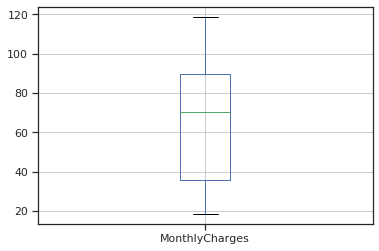

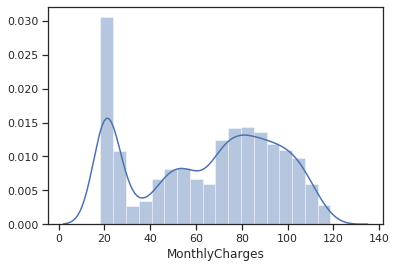

In [17]:
boxPlotList = ['MonthlyCharges','TotalCharges','Days']
item = boxPlotList[0]
print('BoxPlot for : ', item)
df[[item]].boxplot();
plt.show()
ax=sns.distplot(df[[item]],axlabel=item)
plt.show()

### 1.7 CONCLUSION (Monthly Charges)
- Monthly Charges has Median higher than the mean.
- Data is skewed to the left (negatively skewed). 
- It may be because most people have the lowest cost monthly plan resulting in data to be skewed to the left.

BoxPlot for :  TotalCharges


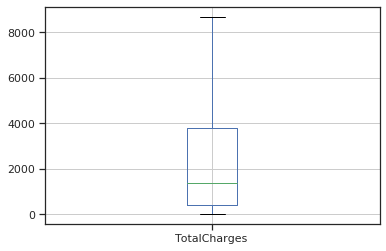

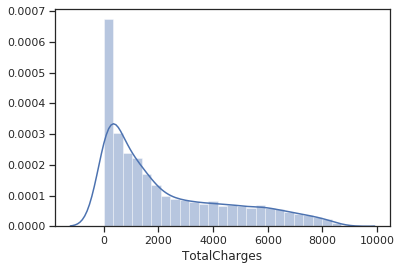

In [18]:
item = boxPlotList[1]
print('BoxPlot for : ', item)
df[[item]].boxplot();
plt.show();
ax=sns.distplot(df[[item]],axlabel=item);
plt.show()

###  1.8 CONCLUSION (Total Charges)
- Total Charges has Median lower than the mean.
- Data is skewed to the right (positively skewed). 
- It may be because most people have the lowest cost monthly plan however they are with the company for a long time resulting in higher total charges till date. 
- These are the people who should be used for higher promotional plan offer because they are good customers.


BoxPlot for :  Days


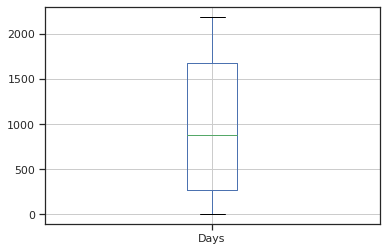

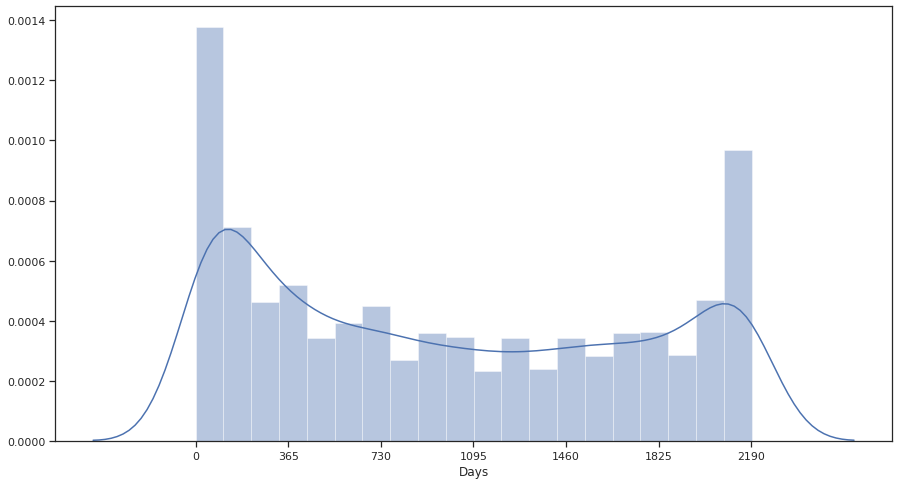

In [19]:
item = boxPlotList[2]
print('BoxPlot for : ', item)
df[[item]].boxplot();
plt.show()
plt.figure(figsize=(15,8))
ax=sns.distplot(df[[item]],bins = 20, axlabel=item)
l = np.arange(0,df[item].max()+1, 365)
ax.set(xticks=l, xticklabels=l)
plt.show()

### CONCLUSION
- The median for days is almost the same as the mean.
- The distribution chart shows a high peak of users with around 100 days, 400 days, and  2500 days.
- The chart shows that people leave either in the first year, or towards the end of each year.
- Most people dropped in the first year, end of second year.
- The contract of the company may be for 1 year or 2 years, after which people dropped. The other customers continued.
- This may be because most users have joined recently or are with the company for a long-long time.
- Focus should be to retain customers who have recently joined or are in the first 2 years of contract. 

# 2. ADDITIONAL Assignment Information

##  2.1 Title

Client outflow research

## 2.2 Description

While a model for predicting the churn of clientele is in the process of being created, Interconnect's marketing department has started figuring out different ways of retaining clients. You'll need to collect the necessary information to assist them.

Compare the monthly payment distribution (*MonthlyCharges*) of all active clients with the clients who have left. Calculate the following statistics for each group: the average, minimum and maximum values, the median, and the values of the 25% and 75% percentiles. Build distribution histograms based on your findings.

Compare the behavior of the clients from the two groups below. For each group, build any two graphs which display:

- The share of telephone users
- The share of Internet users

In [20]:
dfActive = df[df[TARGET]==1]['MonthlyCharges']
dfLeft = df[df[TARGET]==0]['MonthlyCharges']

dfClientTypes = [dfActive,dfLeft]
ListClientTypes = ['Active Clients','Clients Who have Left']

display(dfActive.head(5),dfLeft.head(5))

2     53.85 
4     70.70 
5     99.65 
8     104.80
13    103.70
Name: MonthlyCharges, dtype: float64

0    29.85
1    56.95
3    42.30
6    89.10
7    29.75
Name: MonthlyCharges, dtype: float64

Compare the monthly payment distribution (MonthlyCharges) of all active clients with the clients who have left. Calculate the following statistics for each group: the average, minimum and maximum values, the median, and the values of the 25% and 75% percentiles. Build distribution histograms based on your findings.

Monthly Charges distribution of Active Clients


count    1869.000000
mean     74.441332  
std      24.666053  
min      18.850000  
25%      56.150000  
50%      79.650000  
75%      94.200000  
max      118.350000 
Name: MonthlyCharges, dtype: float64

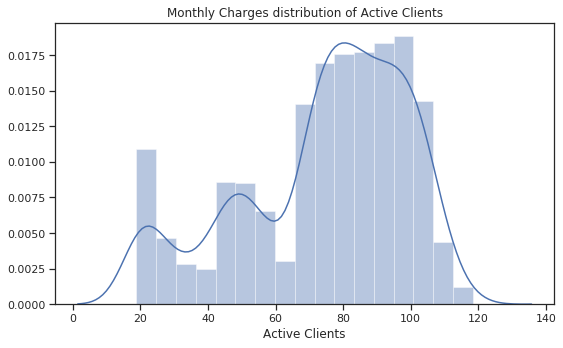

****************************************************************************************************

Monthly Charges distribution of Clients Who have Left


count    5174.000000
mean     61.265124  
std      31.092648  
min      18.250000  
25%      25.100000  
50%      64.425000  
75%      88.400000  
max      118.750000 
Name: MonthlyCharges, dtype: float64

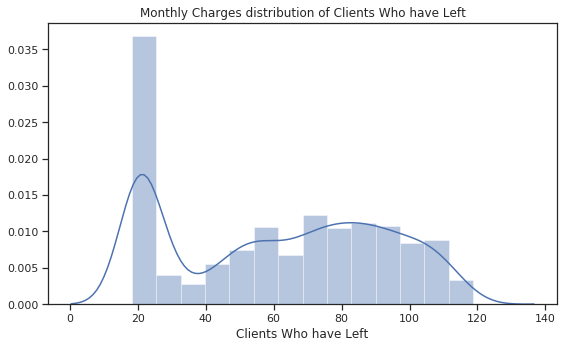

****************************************************************************************************



In [21]:
for i in range(2):
  print('Monthly Charges distribution of ' + ListClientTypes[i])
  display(dfClientTypes[i].describe())
  plt.figure(figsize=(8,5),tight_layout=True)
  plt.title('Monthly Charges distribution of ' + ListClientTypes[i])
  ax=sns.distplot(dfClientTypes[i], axlabel=ListClientTypes[i]);
  plt.show()
  PRINT_SEPARATOR()

## 2.3 CONCLUSION 
- The above graph shows that:
 - Most clients with the monthly charge of approximately 70 or above stayed.    
 - Also, more clients with lowest monthly charge are also active. These may be the newly acquired customers.
 - The clients who left were with the lowest monthly charges.
 - The clients with monthly charge of 20 have mostly caused the distribution to have another peak.
 - In both cases, median is higher than the mean by a small amount. This implies that the data is negatively skewed, evident from the peek at the beginning of the graph.


##  2.4 Compare the behavior of the clients from the two groups below. For each group, build any two graphs which display:

- The share of telephone users
- The share of Internet users


##  2.5  GRAPHS - INTERNET USERS (InternetService)

size                  
InternetService     DSL Fiber optic    NA
ContractCancelled                        
0                  1962  1799        1413
1                  459   1297        113

****************************************************************************************************

PIE CHART OF ALL ACTIVE and CANCELLED CONTRACTS FOR:  InternetService


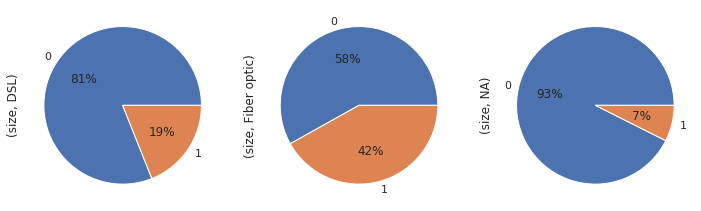

In [22]:
ChartCol = ['InternetService','MultipleLines']
i=0
dfChart = df[[TARGET,ChartCol[i]]]
dfChartStats = dfChart.pivot_table(index=[TARGET],columns=ChartCol[i],aggfunc=['size'])
display(dfChartStats)
PRINT_SEPARATOR()
print('PIE CHART OF ALL ACTIVE and CANCELLED CONTRACTS FOR: ',ChartCol[i])
dfChartStats.plot.pie(subplots=True,legend=False,autopct='%1.0f%%',figsize=(12,8));
plt.show();

##  2.6 CONCLUSION: 
- From the charts above, 19% of clients who had DSL churned
- 42% of Fiber Optic clients churned
- Clients who didn't have InternetService with the company, 7% churned

PIE CHART OF ACTIVE, CANCELLED and ALL CLIENTS for:  InternetService


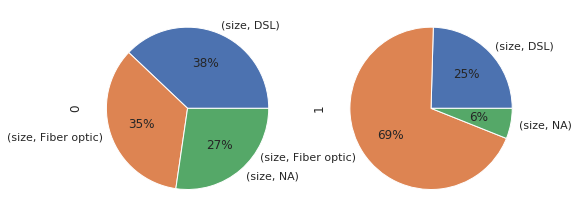

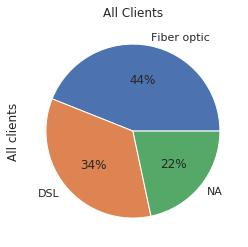

In [23]:
print('PIE CHART OF ACTIVE, CANCELLED and ALL CLIENTS for: ', ChartCol[i])
dfChartStats.T.plot.pie(subplots=True,legend=False,autopct='%1.0f%%',figsize=(8,5));
plt.show();
dfChart[ChartCol[i]].value_counts().plot.pie(title="All Clients",autopct='%1.0f%%',label='All clients');
plt.show();

##  2.7  CONCLUSION
- From the above charts, it is clear that 69% of FiberOptic clients churned, while only 25% of DSL clients churned.
- The FiberOptic might be expensive or unreliable.

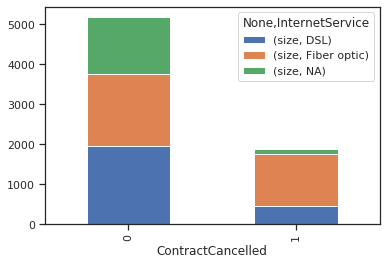

In [24]:
PRINT('BAR CHARTS of: ',ChartCol[i])
dfChartStats.plot.bar(stacked=True);

## 2.8  CONCLUSION
- From the above bar chart, it is clearer that most churn was of clients with FiberOptic.
- Also, the number of clients who don't have internet service is almost the same as FiberOptic or DSL. There is a great opportunity to sell Internetservice to these clients.

## 2.9  GRAPHS - PHONE USERS (MultipleLines)

size            
MultipleLines       NA    No   Yes
ContractCancelled                 
0                  512  2541  2121
1                  170  849   850

****************************************************************************************************

PIE CHART OF ALL ACTIVE and CANCELLED CONTRACTS FOR:  MultipleLines


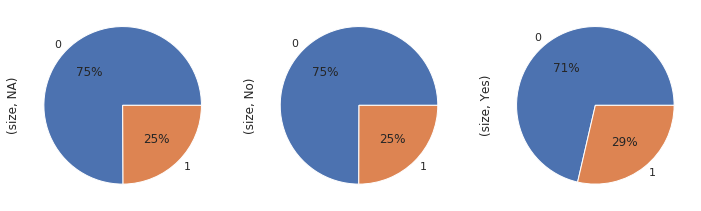

In [25]:
i=1
dfChart = df[[TARGET,ChartCol[i]]]
dfChartStats = dfChart.pivot_table(index=[TARGET],columns=ChartCol[i],aggfunc=['size'])
display(dfChartStats)
PRINT_SEPARATOR()
print('PIE CHART OF ALL ACTIVE and CANCELLED CONTRACTS FOR: ',ChartCol[i])
dfChartStats.plot.pie(subplots=True,legend=False,autopct='%1.0f%%',figsize=(12,8));
plt.show();

##  2.10 CONCLUSION
- 25-29% clients who churned are either with no service, zero lines or multiple lines.

PIE CHART OF ACTIVE, CANCELLED and ALL CLIENTS for:  MultipleLines


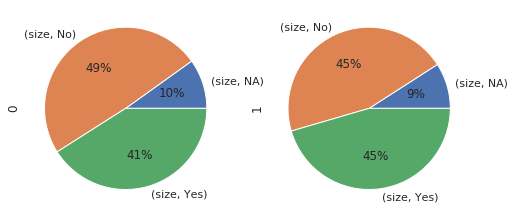

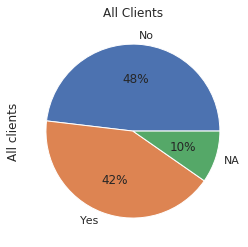

In [26]:
print('PIE CHART OF ACTIVE, CANCELLED and ALL CLIENTS for: ', ChartCol[i])
dfChartStats.T.plot.pie(subplots=True,legend=False,autopct='%1.0f%%',figsize=(8,5));
plt.show();
dfChart[ChartCol[i]].value_counts().plot.pie(title="All Clients",autopct='%1.0f%%',label='All clients');
plt.show();

### CONCLUSION
- Clients who are retained vs Churned have almost same %age (around 45% each). This is a big %age of churn. We need to identify how to retain the clients.
- Very few clients have no service with the company (10%). There is a good chance to gain these 10% clients. 

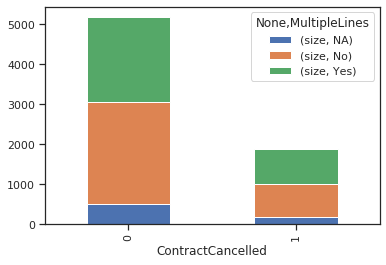

In [27]:
PRINT('BAR CHARTS of: ',ChartCol[i])
dfChartStats.plot.bar(stacked=True);

## 2.11 CONCLUSION
- There is a verys small percentage of clients who don't have multipleLines with the company.
- There is a 50% client churn of the clients who have multiple lines with the company. The reason for churn and ways to retain them should be identified.

### 2.12 HEATMAP and BAR CHART for VARIOUS FEATURES IN RELATION TO TARGET 

In [28]:
##Encode categorical features
dfE=pd.get_dummies(df,drop_first=True)
display(dfE.head())

,MonthlyCharges,TotalCharges,SeniorCitizen,ContractCancelled,Days,Type_One year,Type_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,...,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,gender_Male,Partner_Yes,Dependents_Yes,MultipleLines_No,MultipleLines_Yes
0,29.85,29.85,0,0,31,0,0,1,0,1,...,0,1,0,1,0,0,1,0,0,0
1,56.95,1889.50,0,0,1036,1,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
2,53.85,108.15,0,1,61,0,0,1,0,0,...,0,1,0,1,0,1,0,0,1,0
3,42.30,1840.75,0,0,1371,1,0,0,0,0,...,1,1,0,1,0,1,0,0,0,0
4,70.70,151.65,0,1,61,0,0,1,0,1,...,0,1,0,1,0,0,0,0,1,0


### 2.13  HEAT MAP


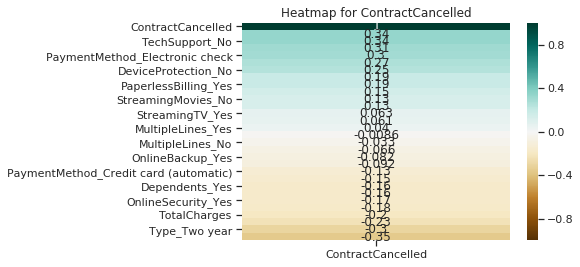

In [29]:
ax = sns.heatmap(dfE.corr()[[TARGET]].sort_values(by=TARGET, ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
ax.set(title="Heatmap for " + TARGET);

In [30]:
display(abs(dfE.corr()[[TARGET]]).sort_values(by=TARGET, ascending=False))

,ContractCancelled
ContractCancelled,1.000000
Days,0.352673
OnlineSecurity_No,0.342637
TechSupport_No,0.337281
InternetService_Fiber optic,0.308020
Type_Two year,0.302253
PaymentMethod_Electronic check,0.301919
OnlineBackup_No,0.268005
DeviceProtection_No,0.252481
InternetService_NA,0.227890


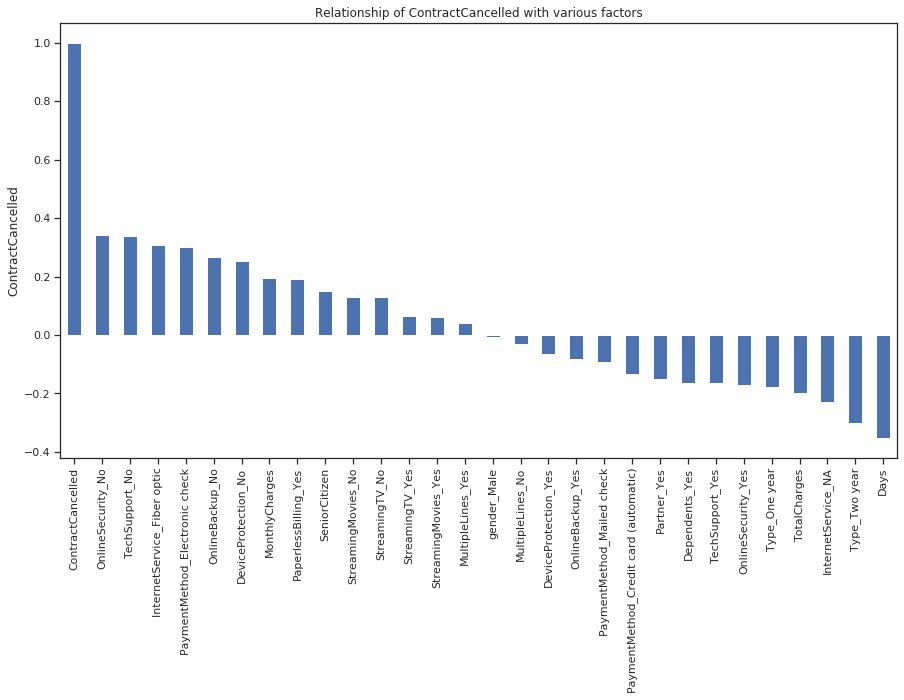

In [31]:
  plt.figure(figsize=(15,8))
  ax = dfE.corr()[TARGET].sort_values(ascending = False).plot(kind='bar')
  ax.set(title="Relationship of " + TARGET + " with various factors",ylabel=TARGET);

## 2.14  CONCLUSION
- The above histogram depicts that ContractCancelled (Target) is:
 
 -- Positively impacted by Monthly Charges, InternetServiceType, Paperless Billing, MonthlyCharges, SeniorCitizen.

 -- Negatively impacted by Days, ContractType, TotalCharges, OnlineSecurity, TechSupport, Dependents. This implies that more the numberofDays, less chance of person leaving the contract.

 -- Most influence is inversely proportional for Days, Type



In [32]:
dflistCol = abs(dfE.corr()[[TARGET]]).sort_values(by=TARGET, ascending=False)
listRemoveCols =  (dflistCol[dflistCol.ContractCancelled < 0.19].index)
print (listRemoveCols)

Index(['Type_One year', 'OnlineSecurity_Yes', 'TechSupport_Yes',
       'Dependents_Yes', 'SeniorCitizen', 'Partner_Yes',
       'PaymentMethod_Credit card (automatic)', 'StreamingMovies_No',
       'StreamingTV_No', 'PaymentMethod_Mailed check', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'MultipleLines_Yes', 'MultipleLines_No', 'gender_Male'],
      dtype='object')


### FEATURES WITH LOW CORRELATION
-  There are columns which have very low correlation with TARGET.
-  I will check FeatureDependencies for each Model to see which features affect a model decision the most.

# 3.0  Check if the data is balanced. 

1869 5174 2.77


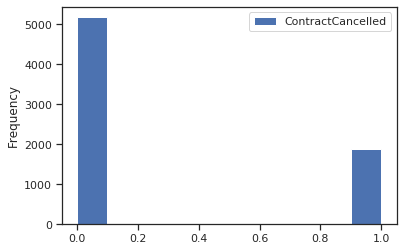

In [33]:
targetPositives = (dfE[TARGET]==1).sum()
targetNegatives = (dfE[TARGET]==0).sum()
ratioTargets = targetNegatives/targetPositives
print(targetPositives, targetNegatives,ROUND2(ratioTargets))
dfE[[TARGET]].plot.hist()

## 3.1  CONCLUSION
- The data is very imbalanced.
- The targetPositives where People have left the contract is 1869
- The targetNegatives where People are with the company is 5174
- This indicates that the targetNegatives records are 2.77 times the targetPositives records. 
- This may result in training bias. 
- I will upsample the training set after the test set is created. Only the training set will be upsampled so that there is no target leakage.

#  4.0 FEATURE ENGINEERING 
SPLIT TRAINING INTO TRAINING (75%) AND TEST (25%)

In [34]:
featuresE =  dfE.drop(TARGET , axis=1)
targetE = dfE[TARGET]

In [35]:
#SPLIT TRAINING INTO TRAINING (75%) AND VALIDATION_TEST (25%)
features_train, features_test, target_train, target_test = train_test_split(
        featuresE, targetE, test_size=0.25, random_state=RANDOM_STATE)

numeric = ["TotalCharges", "MonthlyCharges"]

#Standardize the numerical features.
scaler = StandardScaler()

# < transform feature set >

scaler.fit(features_train[numeric])
features_train.loc[:,numeric] = scaler.transform(features_train[numeric])

# < transform test set >
features_test.loc[:,numeric] = scaler.transform(features_test[numeric])


totsize = len(dfE)
PRINT_SEPARATOR()
print('training set  : {0:.0%}'.format(len(features_train) /totsize),features_train.shape, ', training target   :',target_train.shape)
print('test set: {0:.0%}'.format(len(features_test)/totsize),features_test.shape,', test target :',target_test.shape)

****************************************************************************************************

training set  : 75% (5282, 29) , training target   : (5282,)
test set: 25% (1761, 29) , test target : (1761,)


## UPSAMPLE THE TRAINING SET

In [36]:
features_zeros = features_train[target_train==0]
features_ones = features_train[target_train==1]
target_zeros = target_train[target_train==0]
target_ones = target_train[target_train==1]
print(features_zeros.shape)
print(features_ones.shape)
print(target_zeros.shape)
print(target_ones.shape)

(3887, 29)
(1395, 29)
(3887,)
(1395,)


(8072, 29)
(8072,)


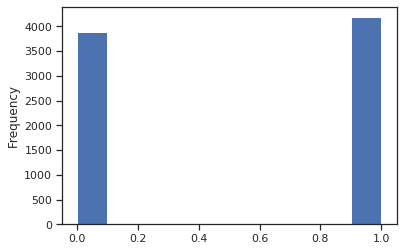

In [37]:
#Create Upsample
repeat = 3
features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
print(features_upsampled.shape)
print(target_upsampled.shape)
features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=RANDOM_STATE)
target_upsampled.plot.hist()

In [38]:
features_train = features_upsampled
target_train = target_upsampled
print(Counter(target_train),features_train.shape,target_train.shape)

Counter({1: 4185, 0: 3887}) (8072, 29) (8072,)


  - Upsampling done on training set, looks much balanced.
  - More features in targetPositives now.
  - There is no leakage since I only upsampled the train set.
  - I made the test set before upsampling the training set.

## 4.1 CREATE A RESULTS DATAFRAME

In [39]:
dfPredictions=pd.DataFrame()
dfPredictions['Actual']=target_test

In [40]:
#Create a dataframe to dataframe name, Model name and model results
column_names = ["Classification Model-name",'Test AUC-ROC','Test Accuracy','TestF1',"Hyper-Parameters"]
##Intitialize lists data. 
df_results = pd.DataFrame(columns = column_names)
display(df_results)

,Classification Model-name,Test AUC-ROC,Test Accuracy,TestF1,Hyper-Parameters


In [41]:
def updateResults(model_name,hyperParam,testAUCROC,testAccuracy,testF1):
    global df_results
    resultRowStr= [model_name,testAUCROC,testAccuracy,testF1,hyperParam]
    #print(resultRowStr,df_results.columns)

    rows = [pd.Series(resultRowStr, index=df_results.columns)]
    ##append the rows
    df_results=df_results.append(rows,ignore_index=True)
    
    ##check the rows 
    display(df_results.tail(1))

##  4.2 MODELS EVALUATION 

In [42]:
def aucroc_scorer(target, predicted,predicted_proba):

  aucrocScore = ROUND3(roc_auc_score(target, predicted_proba[:,1]))
  accuracyScore=ROUND3(accuracy_score(target, predicted, normalize=True))
  f1Score = ROUND3(f1_score(target,predicted))
  
  return(aucrocScore,accuracyScore,f1Score)

In [43]:
def evaluateModel(model1,features_train1,target_train1,features_test1,target_test1,featureImportance,modelName,hyperParam):
    global dfPredictions

    model1.fit(features_train1, target_train1)
    predicted_test = model1.predict(features_test1)
    
    #pred_proba = model.predict_proba(features)[:, 0]
    predicted_proba = model1.predict_proba(features_test1)
      
    fig, axs = plt.subplots(1, 3, figsize=(20, 6)) 

    ax = axs[0]
    if (featureImportance==1):
      k = model1.feature_importances_
    elif (featureImportance==0):
      k = model1.coef_[0]
    else:
      k=0
    if (featureImportance != -1):
      imp = pd.Series(k, index=features_train1.columns).sort_values(ascending=False)
      sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h',ax=ax)

    ax = axs[1]
    skplt.metrics.plot_roc(target_test1, predicted_proba,title='ROC Curve for Test',ax=ax)
    
    ax  = axs[2]
    skplt.metrics.plot_confusion_matrix(target_test1, predicted_test,title='Confusion Matrix for Test',ax=ax)

    dfPredictions[modelName]=predicted_test
    testAUCROC,testAccuracy,testF1 = aucroc_scorer(target_test1, predicted_test,predicted_proba) 

    updateResults(modelName,hyperParam,testAUCROC,testAccuracy,testF1)
    return

# 5.0 MODELS (All CLASSIFIER MODELS)
- Dummy Classifier
- LogisticRegression
- LightGBM with GridSearchCV
- XGB
- XGB with GridSearchCV
- CatBoost
- AdaBoost with DecisionTree
- RandomForest
- CNN with Adam Optimizer

##  5.1 DUMMY CLASSIFIER

,Classification Model-name,Test AUC-ROC,Test Accuracy,TestF1,Hyper-Parameters
0,Dummy Classifier,0.499,0.488,0.354,none


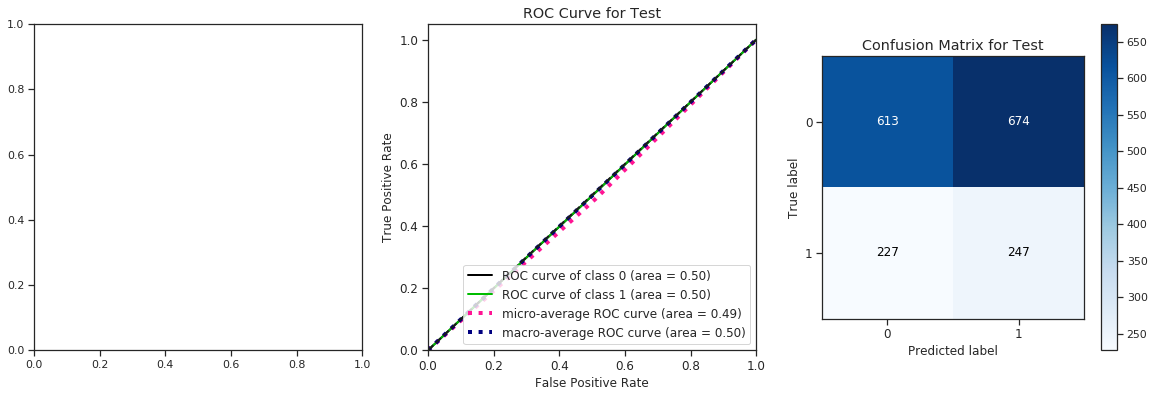

In [44]:
modelName='Dummy Classifier'

model_0 = DummyClassifier(random_state=RANDOM_STATE)
hyperParam = "none"
featureImportance=-1

evaluateModel(model_0,features_train, target_train,features_test,target_test,featureImportance,modelName,hyperParam)

##  5.2  LogisticRegression

,Classification Model-name,Test AUC-ROC,Test Accuracy,TestF1,Hyper-Parameters
1,LogisticReg,0.838,0.737,0.622,none


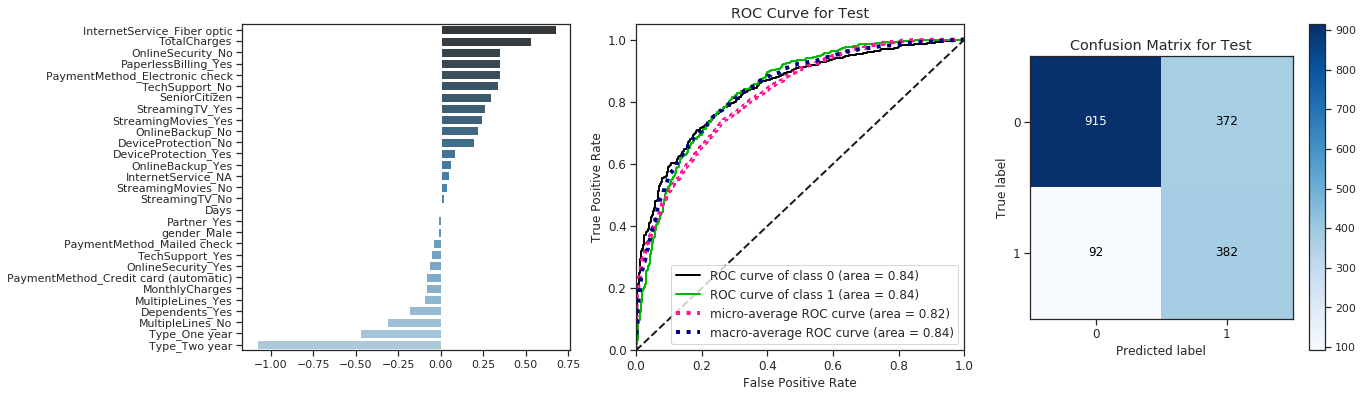

In [45]:
##Logistic Regression
modelName="LogisticReg"
hyperParam = "none"
model = LogisticRegression(random_state=RANDOM_STATE,solver='liblinear')
featureImportance=0

evaluateModel(model,features_train, target_train,features_test,target_test,featureImportance,modelName,hyperParam)

##  5.3  LGBMClassifier with GridSearchCV


 The best score across ALL searched params:
 0.978

 The best parameters across ALL searched params:
 {'eval_metric': 'roc_auc', 'learning_rate': 0.1, 'n_estimators': 1500, 'random_state': 12345}


,Classification Model-name,Test AUC-ROC,Test Accuracy,TestF1,Hyper-Parameters
2,LGBM GridSearchCV,0.908,0.857,0.73,"{'eval_metric': 'roc_auc', 'learning_rate': 0.1, 'n_estimators': 1500, 'random_state': 12345}"


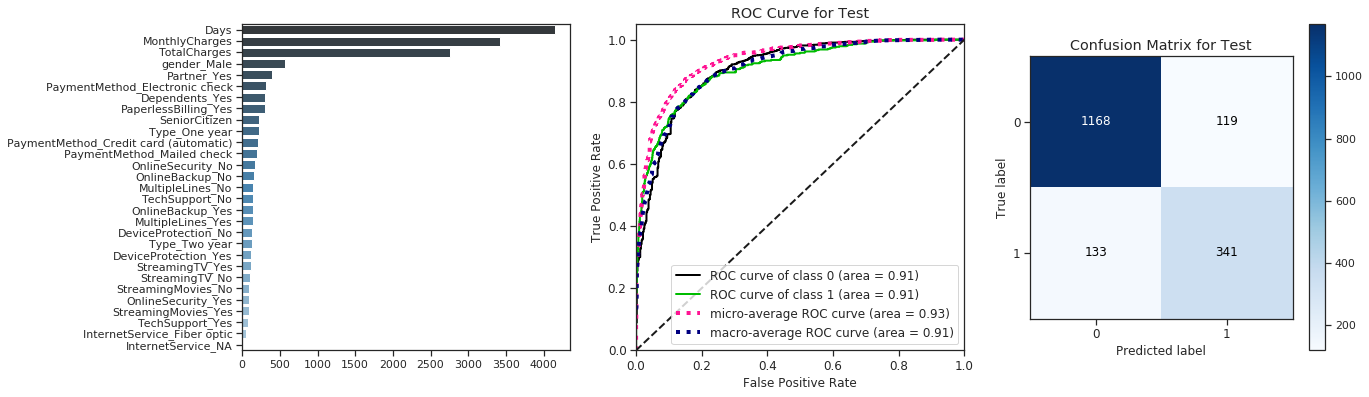

In [46]:
##Setting up parameters for gridsearch
modelName='LGBM GridSearchCV'
featureImportance=1

model = LGBMClassifier()
parameters = {
              'learning_rate' : [0.001,0.5,0.1],
              'n_estimators' : [10,20,50,1500],
              'eval_metric':[SCORING],
              'random_state' : [RANDOM_STATE]
           }
grid = GridSearchCV(estimator=model, param_grid = parameters, scoring=SCORING, cv = 3, n_jobs=-1)
grid.fit(features_train, target_train)
best_param = grid.best_params_
score = ROUND3(grid.best_score_)
print("\n The best score across ALL searched params:\n",
          score)
    
print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)

##Specify the training parameters 
model = LGBMClassifier(   
                          learning_rate=best_param['learning_rate'], 
                          n_estimators=500,
                          eval_metric=SCORING,
                          random_state = RANDOM_STATE
                    )


evaluateModel(model,features_train, target_train,features_test,target_test,featureImportance,modelName,best_param)

##  5.4  LGBMClassifier with GridSearchCV, with reduced number of features
- The feature importance shows that only few features are important to the model.

- I will try to evaluate this model with only those features.

,Classification Model-name,Test AUC-ROC,Test Accuracy,TestF1,Hyper-Parameters
3,LGBM ReducedFeatures,0.904,0.854,0.738,"{'eval_metric': 'roc_auc', 'learning_rate': 0.1, 'n_estimators': 1500, 'random_state': 12345}"


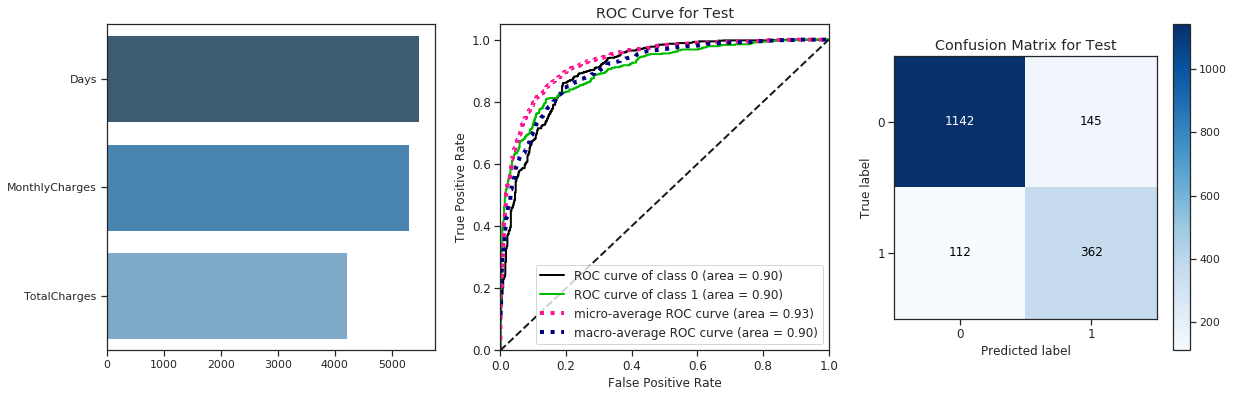

In [47]:
modelName = 'LGBM ReducedFeatures'
featuresreduced_train = features_train[['Days','MonthlyCharges','TotalCharges']]
featuresreduced_test = features_test[['Days','MonthlyCharges','TotalCharges']]
evaluateModel(model,featuresreduced_train, target_train,featuresreduced_test,target_test,featureImportance,modelName,best_param)

##  5.5  XGBoost OneHotEncoding

,Classification Model-name,Test AUC-ROC,Test Accuracy,TestF1,Hyper-Parameters
4,XGB,0.896,0.814,0.698,"learning_rate = 0.03, metrics=auc,n_estimators = 1500"


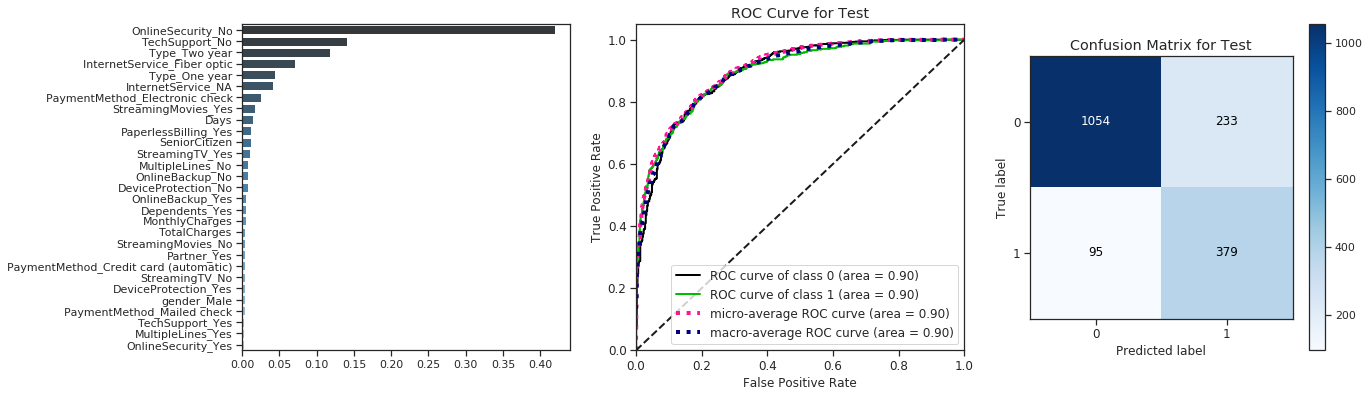

In [48]:
##Specify the training parameters 
modelName='XGB'
featureImportance=1
model =  XGBClassifier( learning_rate = 0.03, metrics='auc',n_estimators = 1500,random_state=RANDOM_STATE)
hyperParam = 'learning_rate = 0.03, metrics=auc,n_estimators = 1500'

evaluateModel(model,features_train, target_train,features_test,target_test,featureImportance,modelName,hyperParam)

##  5.6  XGB Classifier with GridSearchCV

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.5min finished



 The best score across ALL searched params:
 0.9223823269346221

 The best parameters across ALL searched params:
 {'colsample_bytree': 0.7, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 50, 'nthread': 4, 'random_state': 12345, 'scale_pos_weight': 3.25, 'silent': 1, 'subsample': 0.7}


,Classification Model-name,Test AUC-ROC,Test Accuracy,TestF1,Hyper-Parameters
5,XGB GridSearchCV,0.888,0.764,0.663,"{'colsample_bytree': 0.7, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 50, 'nthread': 4, 'random_state': 12345, 'scale_pos_weight': 3.25, 'silent': 1, 'subsample': 0.7}"


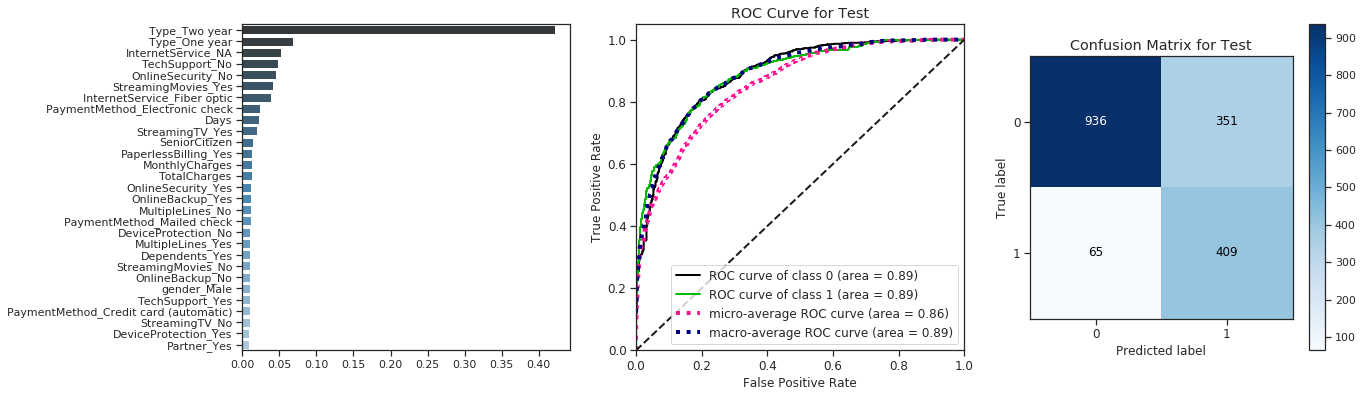

In [49]:
modelName='XGB GridSearchCV'
featureImportance=1
model = XGBClassifier()

##Setting up parameters for gridsearch
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'max_depth': [6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [50],
              'scale_pos_weight':[1.25,1.5,2,ratioTargets,3,3.25,3.5,4],
              'random_state':[RANDOM_STATE]}

grid = GridSearchCV(estimator=model,
                        param_grid=parameters,
                        scoring=SCORING,
                        cv = 5,
                        n_jobs = -1,
                        verbose=1)

grid.fit(features_train, target_train)
best_param = grid.best_params_
score = ROUND3(grid.best_score_)
print("\n The best score across ALL searched params:\n",
          grid.best_score_)
print("\n The best parameters across ALL searched params:\n",
         best_param)

##Specify the training parameters 
model = XGBClassifier(
                      nthread=best_param['nthread'],
                      max_depth= best_param['max_depth'],
                      min_child_weight= best_param['min_child_weight'],
                      silent= best_param['silent'],
                      subsample= best_param['subsample'],
                      colsample_bytree= best_param['colsample_bytree'],
                      learning_rate=0.03,  
                      n_estimators=500,
                      random_state = RANDOM_STATE,
                      scale_pos_weight=best_param['scale_pos_weight'],
                      scoring=SCORING,
                      njobs=-1
                     )

evaluateModel(model,features_train, target_train,features_test,target_test,featureImportance,modelName,best_param)

## 5.7  CatBoost

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 0.6749306	total: 69.2ms	remaining: 623ms
1:	learn: 0.6600762	total: 164ms	remaining: 655ms
2:	learn: 0.6450199	total: 257ms	remaining: 601ms
3:	learn: 0.6302814	total: 351ms	remaining: 526ms
4:	learn: 0.6166424	total: 366ms	remaining: 366ms
5:	learn: 0.6038624	total: 459ms	remaining: 306ms
6:	learn: 0.5902741	total: 554ms	remaining: 237ms
7:	learn: 0.5788114	total: 650ms	remaining: 162ms
8:	learn: 0.5667276	total: 665ms	remaining: 73.9ms
9:	learn: 0.5577408	total: 758ms	remaining: 0us
0:	learn: 0.6746841	total: 15ms	remaining: 135ms
1:	learn: 0.6608539	total: 91.3ms	remaining: 365ms
2:	learn: 0.6464065	total: 188ms	remaining: 438ms
3:	learn: 0.6319108	total: 284ms	remaining: 426ms
4:	learn: 0.6188486	total: 383ms	remaining: 383ms
5:	learn: 0.6074040	total: 398ms	remaining: 265ms
6:	learn: 0.5940404	total: 489ms	remaining: 210ms
7:	learn: 0.5828973	total: 584ms	remaining: 146ms
8:	learn: 0.5719703	total: 679ms	remaining: 75.4ms
9:	learn: 0.5632184	total: 695ms	remaining: 0us
0

[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  6.6min finished


0:	learn: 0.5431684	total: 17.2ms	remaining: 1.01s
1:	learn: 0.4772970	total: 33.1ms	remaining: 960ms
2:	learn: 0.4369063	total: 126ms	remaining: 2.39s
3:	learn: 0.4073563	total: 222ms	remaining: 3.11s
4:	learn: 0.3862520	total: 318ms	remaining: 3.5s
5:	learn: 0.3654545	total: 334ms	remaining: 3s
6:	learn: 0.3515414	total: 428ms	remaining: 3.24s
7:	learn: 0.3439349	total: 524ms	remaining: 3.41s
8:	learn: 0.3366648	total: 621ms	remaining: 3.52s
9:	learn: 0.3295017	total: 715ms	remaining: 3.57s
10:	learn: 0.3239188	total: 732ms	remaining: 3.26s
11:	learn: 0.3134421	total: 825ms	remaining: 3.3s
12:	learn: 0.3065384	total: 921ms	remaining: 3.33s
13:	learn: 0.3022944	total: 1.02s	remaining: 3.34s
14:	learn: 0.2968929	total: 1.11s	remaining: 3.33s
15:	learn: 0.2899879	total: 1.13s	remaining: 3.1s
16:	learn: 0.2793725	total: 1.22s	remaining: 3.09s
17:	learn: 0.2707466	total: 1.32s	remaining: 3.07s
18:	learn: 0.2679879	total: 1.41s	remaining: 3.04s
19:	learn: 0.2618984	total: 1.43s	remaining: 

,Classification Model-name,Test AUC-ROC,Test Accuracy,TestF1,Hyper-Parameters
6,CatBoost,0.86,0.798,0.642,"{'depth': 10, 'iterations': 60, 'l2_leaf_reg': 3, 'learning_rate': 0.3, 'random_state': 12345}"


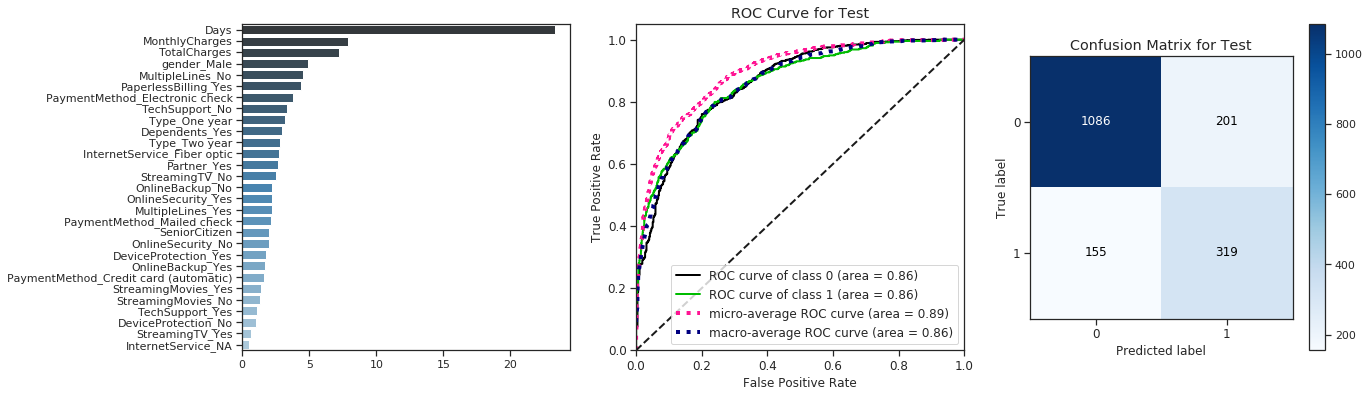

In [50]:
##Setting up parameters for gridsearch
modelName='CatBoost'
featureImportance=1
model = CatBoostClassifier()
parameters = {
           'learning_rate': [0.03,0.1, 0.3],
        'depth': [10],
        'l2_leaf_reg': [3, 5, 7, 9],
        'iterations':[10,20,60],
        'random_state':[RANDOM_STATE]
}
grid = GridSearchCV(estimator=model, param_grid = parameters, scoring=SCORING, cv = 3, n_jobs=-1, verbose=1)

grid.fit(features_train, target_train)

best_param = grid.best_params_
score= ROUND3(grid.best_score_)
print("\n The best score across ALL searched params:\n",
          grid.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)

##Specify the training parameters 

model = CatBoostClassifier(
                          depth=best_param['depth'], 
                          learning_rate=best_param['learning_rate'],
                          l2_leaf_reg = best_param['l2_leaf_reg'],
                  #        scale_pos_weight=best_param['scale_pos_weight'],
                          metric_period=50,
                          eval_metric='AUC',
                          iterations=best_param['iterations'],
                          random_state=RANDOM_STATE,
                          )

evaluateModel(model,features_train, target_train,features_test,target_test,featureImportance,modelName,best_param)

##  5.8 Catboost, with reduced number of features
- The feature importance shows that only few features are important to the model.

- I will try to evaluate this model with only those features.

0:	total: 9.37ms	remaining: 553ms
50:	total: 1.99s	remaining: 351ms
59:	total: 2.38s	remaining: 0us


,Classification Model-name,Test AUC-ROC,Test Accuracy,TestF1,Hyper-Parameters
7,CatBoost ReducedFeatures,0.881,0.805,0.69,"{'depth': 10, 'iterations': 60, 'l2_leaf_reg': 3, 'learning_rate': 0.3, 'random_state': 12345}"


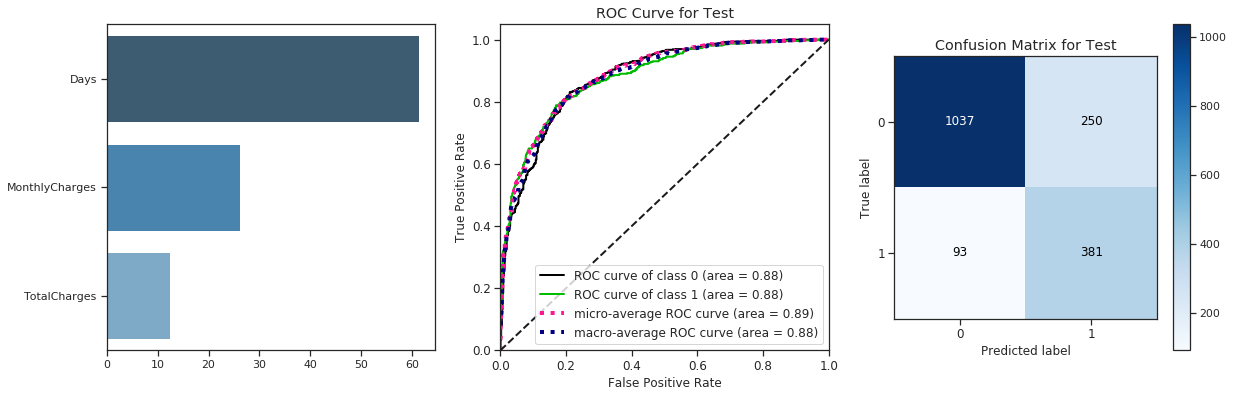

In [51]:
modelName = 'CatBoost ReducedFeatures'
featuresreduced_train = features_train[['Days','MonthlyCharges','TotalCharges']]
featuresreduced_test = features_test[['Days','MonthlyCharges','TotalCharges']]
evaluateModel(model,featuresreduced_train, target_train,featuresreduced_test,target_test,featureImportance,modelName,best_param)

##  5.9  AdaBoost DecisionTree

,Classification Model-name,Test AUC-ROC,Test Accuracy,TestF1,Hyper-Parameters
8,AdaBoost DecisionTree,0.902,0.859,0.731,"min_samples_split=10,max_depth=4,class_weight=balanced"


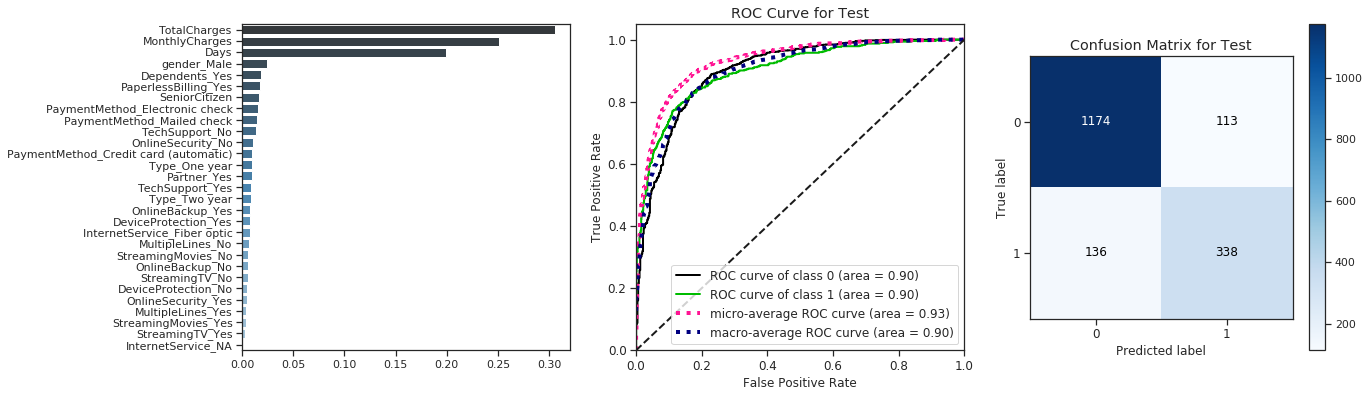

In [52]:
modelName = 'AdaBoost DecisionTree'
featureImportance=1
hyperParam = 'min_samples_split=10,max_depth=4,class_weight=balanced'

dcst = DecisionTreeClassifier(min_samples_split=10,max_depth=4,class_weight='balanced',random_state=RANDOM_STATE)
model = AdaBoostClassifier(dcst,n_estimators=500,learning_rate=0.07,random_state=RANDOM_STATE)

evaluateModel(model,features_train, target_train,features_test,target_test,featureImportance,modelName,hyperParam)

## 5.10 AdaBoost DecisionTree, with reduced number of features
- The feature importance shows that only few features are important to the model.

- I will try to evaluate this model with only those features.

,Classification Model-name,Test AUC-ROC,Test Accuracy,TestF1,Hyper-Parameters
9,AdaBoost DecisionTree ReducedFeatures,0.902,0.858,0.729,"{'depth': 10, 'iterations': 60, 'l2_leaf_reg': 3, 'learning_rate': 0.3, 'random_state': 12345}"


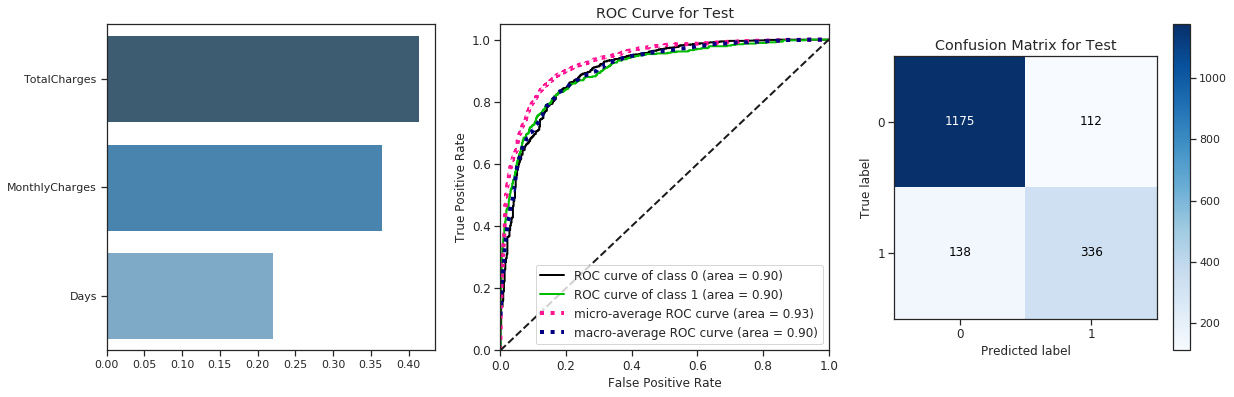

In [53]:
modelName = 'AdaBoost DecisionTree ReducedFeatures'
featuresreduced_train = features_train[['Days','MonthlyCharges','TotalCharges']]
featuresreduced_test = features_test[['Days','MonthlyCharges','TotalCharges']]
evaluateModel(model,featuresreduced_train, target_train,featuresreduced_test,target_test,featureImportance,modelName,best_param)

##  5.11  RandomForestClassifier

,Classification Model-name,Test AUC-ROC,Test Accuracy,TestF1,Hyper-Parameters
10,RandomForest,0.854,0.758,0.64,"min_samples_split=80,max_depth=100,n_estimators=250"


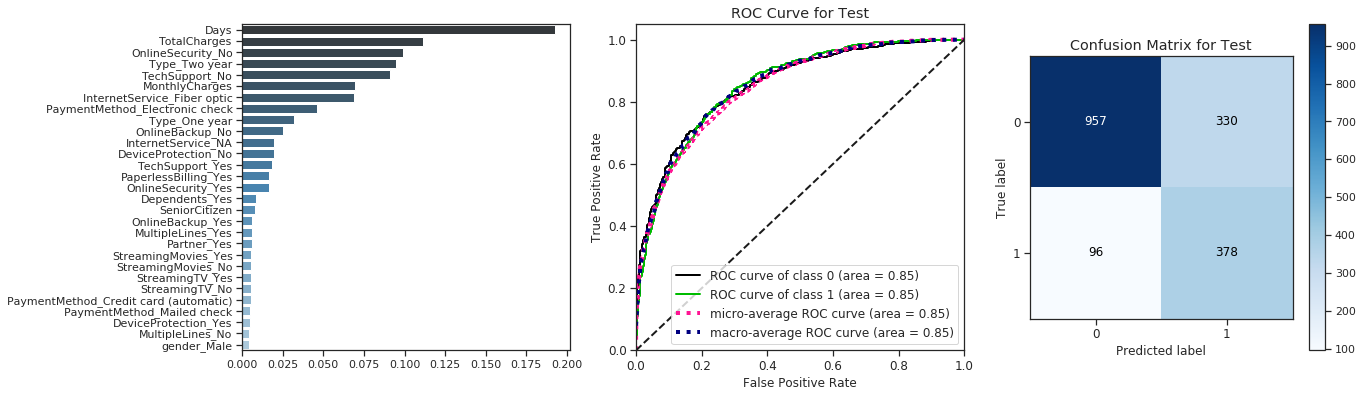

In [54]:
modelName = 'RandomForest'
featureImportance=1
hyperParam = 'min_samples_split=80,max_depth=100,n_estimators=250'
model = RandomForestClassifier(min_samples_split=80,max_depth=100,n_estimators=250,random_state=RANDOM_STATE)

evaluateModel(model,features_train, target_train,features_test,target_test,featureImportance,modelName,hyperParam)

##  5.12  CNN
-  CNN with Adam Optimizer

In [55]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(features_train.shape[1],)),
  
    keras.layers.Dense(256, activation=tf.nn.softmax),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['AUC','accuracy'],
              )

model.fit(features_train, target_train, epochs=10, batch_size=100,verbose=0)

modelName = 'KerasNN'
predicted = model.predict(features_test)
loss,testAUCROC,testAccuracy = model.evaluate(features_test, target_test)
testF1 = ''

dfPredictions[modelName]=predicted
hyperParam = 'epochs=10'
updateResults(modelName,hyperParam,ROUND3(testAUCROC),ROUND3(testAccuracy),testF1)

1761/1761 [==============================] - 0s 261us/sample - loss: 0.5965 - AUC: 0.8338 - accuracy: 0.6718


,Classification Model-name,Test AUC-ROC,Test Accuracy,TestF1,Hyper-Parameters
11,KerasNN,0.834,0.672,,epochs=10


#  6. FINAL RESULT
- Following is the display of final results of all Models that were trained and tested.
- Models are arranged in descending order of Test AUC-ROC and Accuracy
- The Best Models (with Best Test AUC-ROC, and Accuracy) are on the top rows, and worst models at bottom rows 

## 6.1 MODEL RESULTS

In [56]:
dfResultsSorted = df_results.sort_values(by=['Test AUC-ROC'],ascending=False)
display(dfResultsSorted)

,Classification Model-name,Test AUC-ROC,Test Accuracy,TestF1,Hyper-Parameters
2,LGBM GridSearchCV,0.908,0.857,0.73,"{'eval_metric': 'roc_auc', 'learning_rate': 0.1, 'n_estimators': 1500, 'random_state': 12345}"
3,LGBM ReducedFeatures,0.904,0.854,0.738,"{'eval_metric': 'roc_auc', 'learning_rate': 0.1, 'n_estimators': 1500, 'random_state': 12345}"
8,AdaBoost DecisionTree,0.902,0.859,0.731,"min_samples_split=10,max_depth=4,class_weight=balanced"
9,AdaBoost DecisionTree ReducedFeatures,0.902,0.858,0.729,"{'depth': 10, 'iterations': 60, 'l2_leaf_reg': 3, 'learning_rate': 0.3, 'random_state': 12345}"
4,XGB,0.896,0.814,0.698,"learning_rate = 0.03, metrics=auc,n_estimators = 1500"
5,XGB GridSearchCV,0.888,0.764,0.663,"{'colsample_bytree': 0.7, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 50, 'nthread': 4, 'random_state': 12345, 'scale_pos_weight': 3.25, 'silent': 1, 'subsample': 0.7}"
7,CatBoost ReducedFeatures,0.881,0.805,0.69,"{'depth': 10, 'iterations': 60, 'l2_leaf_reg': 3, 'learning_rate': 0.3, 'random_state': 12345}"
6,CatBoost,0.860,0.798,0.642,"{'depth': 10, 'iterations': 60, 'l2_leaf_reg': 3, 'learning_rate': 0.3, 'random_state': 12345}"
10,RandomForest,0.854,0.758,0.64,"min_samples_split=80,max_depth=100,n_estimators=250"
1,LogisticReg,0.838,0.737,0.622,none


## 6.2 Models that have AUC-ROC > 0.88

In [57]:
display(dfResultsSorted[dfResultsSorted['Test AUC-ROC']>0.88])

,Classification Model-name,Test AUC-ROC,Test Accuracy,TestF1,Hyper-Parameters
2,LGBM GridSearchCV,0.908,0.857,0.73,"{'eval_metric': 'roc_auc', 'learning_rate': 0.1, 'n_estimators': 1500, 'random_state': 12345}"
3,LGBM ReducedFeatures,0.904,0.854,0.738,"{'eval_metric': 'roc_auc', 'learning_rate': 0.1, 'n_estimators': 1500, 'random_state': 12345}"
8,AdaBoost DecisionTree,0.902,0.859,0.731,"min_samples_split=10,max_depth=4,class_weight=balanced"
9,AdaBoost DecisionTree ReducedFeatures,0.902,0.858,0.729,"{'depth': 10, 'iterations': 60, 'l2_leaf_reg': 3, 'learning_rate': 0.3, 'random_state': 12345}"
4,XGB,0.896,0.814,0.698,"learning_rate = 0.03, metrics=auc,n_estimators = 1500"
5,XGB GridSearchCV,0.888,0.764,0.663,"{'colsample_bytree': 0.7, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 50, 'nthread': 4, 'random_state': 12345, 'scale_pos_weight': 3.25, 'silent': 1, 'subsample': 0.7}"
7,CatBoost ReducedFeatures,0.881,0.805,0.69,"{'depth': 10, 'iterations': 60, 'l2_leaf_reg': 3, 'learning_rate': 0.3, 'random_state': 12345}"


## 6.3 Model Predictions
- All Predictions were stored in a Dataframe and were also displayed.

In [58]:
display(dfPredictions.head(5))

,Actual,Dummy Classifier,LogisticReg,LGBM GridSearchCV,LGBM ReducedFeatures,XGB,XGB GridSearchCV,CatBoost,CatBoost ReducedFeatures,AdaBoost DecisionTree,AdaBoost DecisionTree ReducedFeatures,RandomForest,KerasNN
1128,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0.195734
2875,1,1,1,1,1,1,1,1.0,1.0,1,1,1,0.799609
1783,1,1,1,1,1,1,1,1.0,1.0,1,1,1,0.925138
3804,0,1,1,0,1,1,1,1.0,1.0,0,0,1,0.780107
6087,0,0,0,0,0,0,0,0.0,0.0,0,0,0,0.432559


# 7. OVERALL CONCLUSION
I trained and tested various models and was able to get the AUC-ROC score > 0.88 on six different models.
###  BEST 7 MODELS 
   - 1. LGBM GridSearch (All features) - 0.908
   - 2. LGBM with reduced features (Days, MonthlyCharges, TotalCharges) - 0.904
   - 3. AdaBoost DecisionTree ReducedFeatures - 0.902
   - 4. AdaBoost DecisionTree (all features) - 0.902
   - 5. XGBoost - 0.896
   - 6. XGBoost GridSearchCV - 0.888
   - 7. Catboost Reduced Features - 0.881

###  Upsampling to handle Imbalanced Data:
- Features were balanced in the models using upsampling to remove Bias and have better predictions. Test Set was created from the dataset before features were upsampled.
- Additional Assignment was also completed and is a part of the EDA 


# REVIEWER'S CRITERIA

 - Have you performed all the steps? YES
 - Does the solution match the task condition? YES
 - Have you trained and tested the model correctly? YES
 - What is the quality score of the best model? 0.908, LGBM YES
 - Have you kept to the project structure? YES
 - Have you kept the code neat? YES

# SOLUTIONS REPORT

###  A. What steps of the plan were performed and what steps were skipped (explain why)?
 - I completed all steps as specified in the Project Plan
   - 1. DataUploading
   - 2. DataPreprocessing
   - 3. Exploratory Data Analysis
   - 4. Feature Engineering and Handling Imbalanced Data
   - 5. Model Evaluation Feature Importances
   - 6. Final Results and Summary

### B. What difficulties did you encounter and how did you manage to solve them?
- I encountered following issues:
    - 1. The main difficulty I had was to identify the incorrectness in my first submission of the project. I was getting 0.98 AUC-ROC. After checking the code a few times, I realized that there was no target leakage. However the AUC-ROC score was astonishingly high. I had not done any upsampling either. 
    - 2. Based on the reviewer's feedback, I continued reviewing the code. I found out that I was doing calculation for Days using Today's Date instead of the Cutoff date (of when the data was taken) specified in the assignment.
    - 3. Once I started using the Cutoff date, my results were not good.
    - 4. This challenged me to use upsampling, and better tuning of models.
    - 5. Finally I was able to get great results.

### C. What were some of the key steps to solving the task?
- Following are the key steps in my opinion
   - 1.  Project Planning and approach to problem solving
   - 2.  Datapreprocessing and review of data
   - 3.  Combine datasets and handle NaN values
   - 4.  Identify TARGET and how to get the TARGET from the given EndDate
   - 5.  Identify which type of model to use - Classification
   - 6.  Evaluate correlation of features with TARGET
   - 7.  Evaluate data imbalance and how to handle the imbalance
   - 8.  Ensure that upsampling doesn't introduce target leakage.
   - 8.  Feature engineering
   - 8.  Identify models to use
   - 9.  Identify model evaluation methods
   - 10. Identify Cross-validation parameters for each model
   - 11. Identify feature-importances of models and evaluate models on reduced feaure sets.
   - 12. Evaluate models on the project requirements of AUC-ROC and Accuracy.
   
### D. What is your final model and what quality score does it have?
- Following are my top 7 models with AUC-ROC score > 0.88
   - 1. LGBM GridSearch (All featurs) - 0.908
   - 2. LGBM with reduced features (Days, MonthlyCharges, TotalCharges) - 0.904
   - 3. AdaBoost DecisionTree ReducedFeatures - 0.902
   - 4. AdaBoost DecisionTree (all features) - 0.902
   - 5. XGBoost - 0.896
   - 6. XGBoost GridSearchCV - 0.886
   - 7. Catboost with Reduced Features - 0.881
                                                                   
### E. Here are some of the criteria used by the team leader:
### F. Did you answer all the questions? 
     - Yes
### G. Are the answers clear?
     - Yes
    - 

THANK YOU VERY MUCH FOR REVIEWING MY PROJECT.